<ipython-input-2-1f75abd7c2d2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='truthfulness', data=df, palette='Set2')


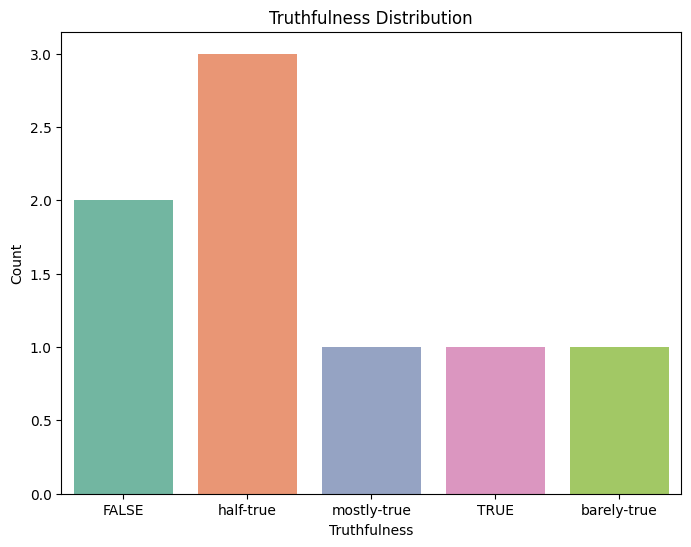

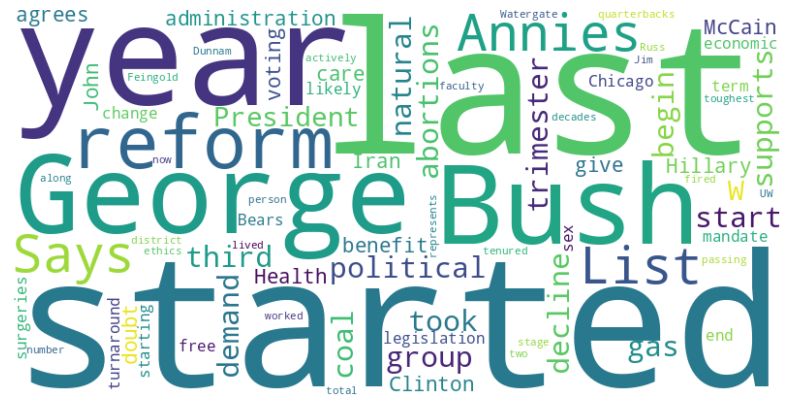

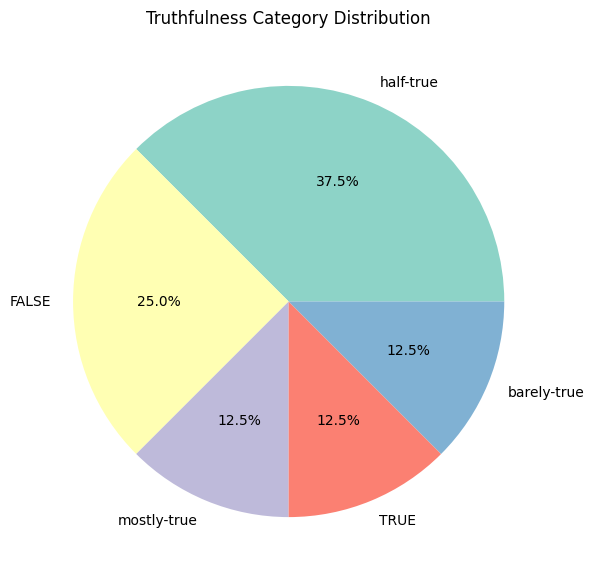

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sample data (replace with your full data)
data = {
    'id': ['2635.json', '10540.json', '324.json', '1123.json', '9028.json', '12465.json', '2342.json', '153.json'],
    'truthfulness': ['FALSE', 'half-true', 'mostly-true', 'FALSE', 'half-true', 'TRUE', 'barely-true', 'half-true'],
    'statement': [
        "Says the Annies List political group supports third-trimester abortions on demand.",
        "When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.",
        "Hillary Clinton agrees with John McCain 'by voting to give George Bush the benefit of the doubt on Iran.'",
        "Health care reform legislation is likely to mandate free sex change surgeries.",
        "The economic turnaround started at the end of my term.",
        "The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.",
        "Jim Dunnam has not lived in the district he represents for years now.",
        "I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the truthfulness distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='truthfulness', data=df, palette='Set2')
plt.title('Truthfulness Distribution')
plt.xlabel('Truthfulness')
plt.ylabel('Count')
plt.show()

# Word Cloud for all statements
all_statements = ' '.join(df['statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_statements)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Pie Chart for truthfulness categories
truthfulness_counts = df['truthfulness'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(truthfulness_counts, labels=truthfulness_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(truthfulness_counts)))
plt.title('Truthfulness Category Distribution')
plt.show()

Accuracy: 0.4709
Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.99      0.64       944
         1.0       0.27      0.02      0.04       304
         2.0       0.00      0.00      0.00        92
         3.0       0.20      0.01      0.02        92
         4.0       0.00      0.00      0.00        45
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        23
         7.0       0.50      0.02      0.03        66
         8.0       1.00      0.03      0.05        71
         9.0       0.40      0.04      0.07        98
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00        42
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         6
        18.0       0.00      0.00      0.00        29
        19.0       0.00      0.00      0.00        38
        36.0       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-5-126614067b99>:43: FutureWarning:

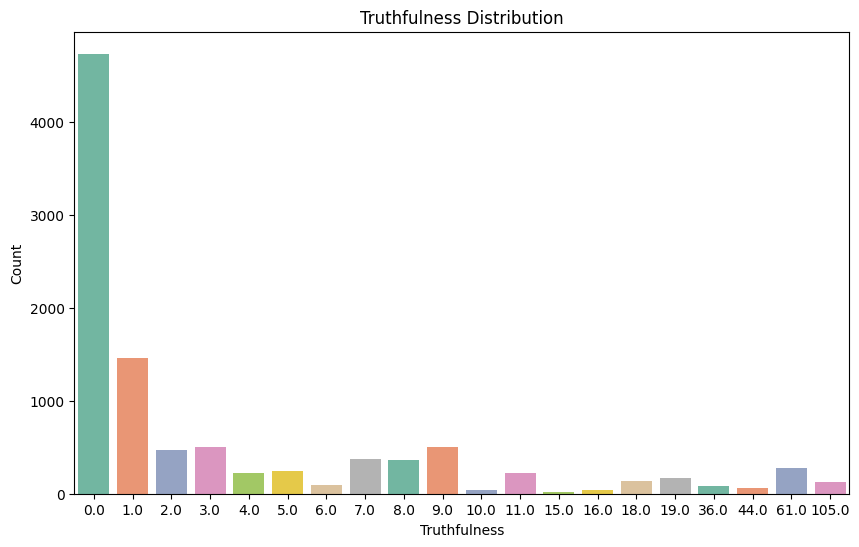

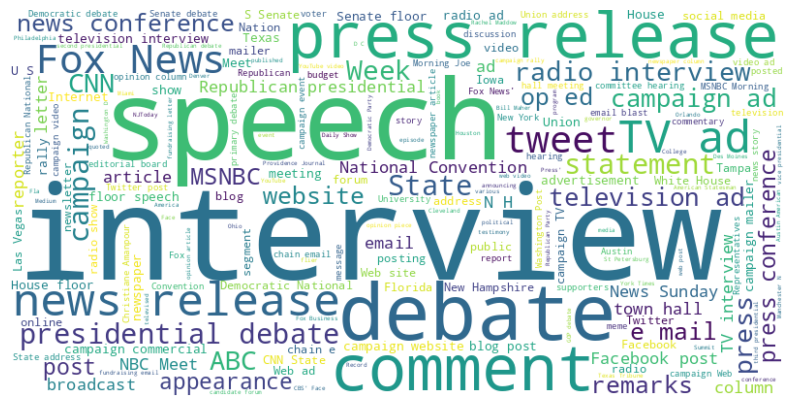

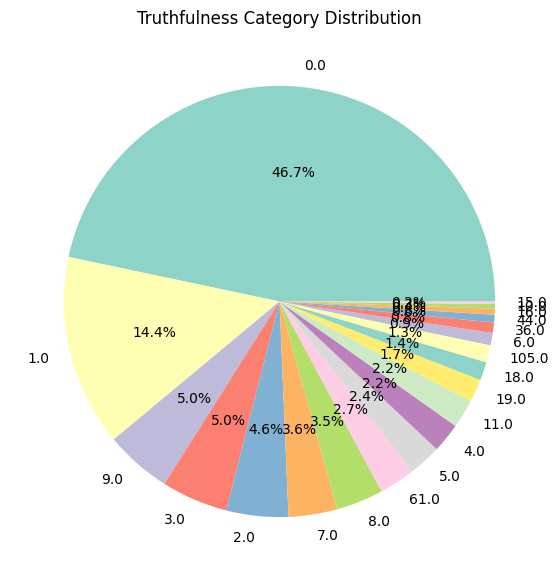

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the TSV file from the given path
df = pd.read_csv('/content/train.tsv', sep='\t', names=['id', 'truthfulness', 'statement'])

# Handle missing values (drop rows with NaN in 'statement' column)
df = df.dropna(subset=['statement'])

# Vectorization (Convert text to numerical representation)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['statement'])

# Encode the truthfulness labels
y = df['truthfulness']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier (you can also use other models)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualizations

# Plotting the truthfulness distribution (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='truthfulness', data=df, palette='Set2')
plt.title('Truthfulness Distribution')
plt.xlabel('Truthfulness')
plt.ylabel('Count')
plt.show()

# Word Cloud for all statements
all_statements = ' '.join(df['statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_statements)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Pie Chart for truthfulness categories
truthfulness_counts = df['truthfulness'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(truthfulness_counts, labels=truthfulness_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(truthfulness_counts)))
plt.title('Truthfulness Category Distribution')
plt.show()

Accuracy: 0.4709
Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.99      0.64       944
         1.0       0.27      0.02      0.04       304
         2.0       0.00      0.00      0.00        92
         3.0       0.20      0.01      0.02        92
         4.0       0.00      0.00      0.00        45
         5.0       0.00      0.00      0.00        44
         6.0       0.00      0.00      0.00        23
         7.0       0.50      0.02      0.03        66
         8.0       1.00      0.03      0.05        71
         9.0       0.40      0.04      0.07        98
        10.0       0.00      0.00      0.00         6
        11.0       0.00      0.00      0.00        42
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         6
        18.0       0.00      0.00      0.00        29
        19.0       0.00      0.00      0.00        38
        36.0       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-8-bc6605e82fc0>:44: FutureWarning:

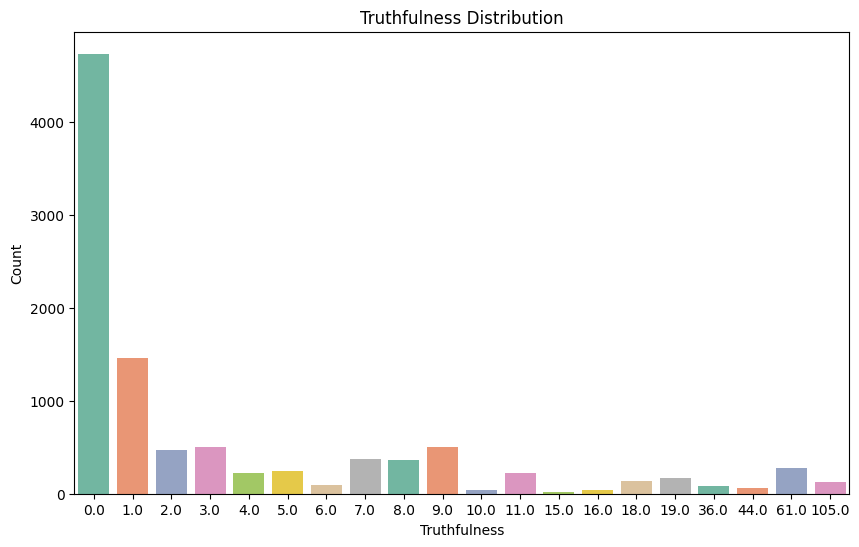

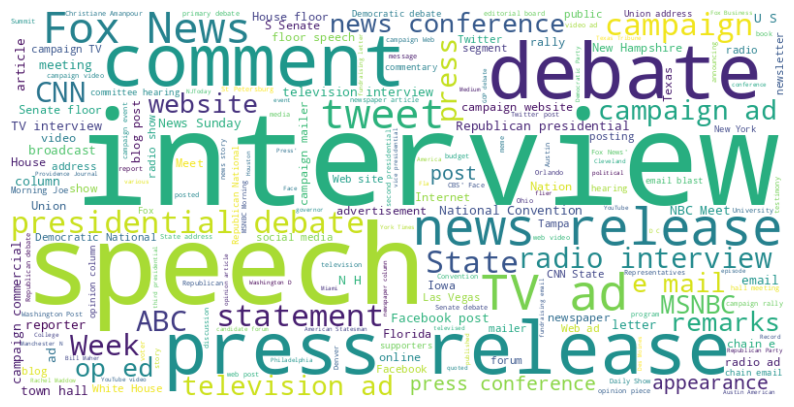

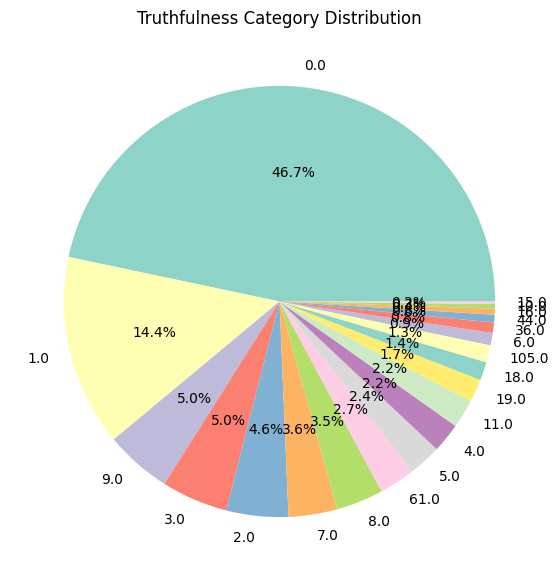

<ipython-input-8-bc6605e82fc0>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='viridis')


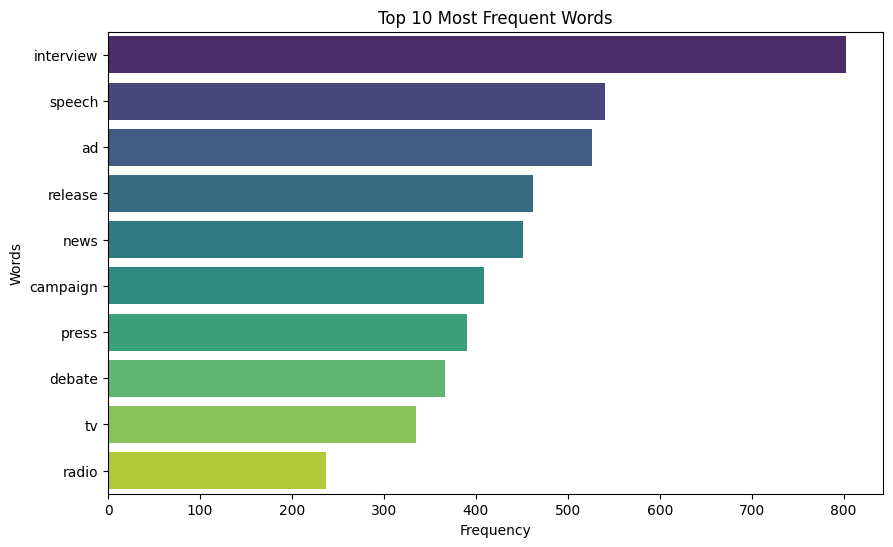

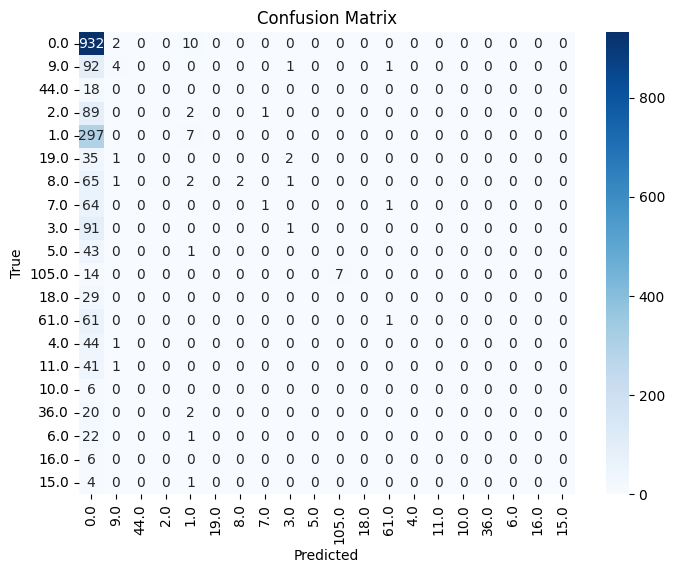

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the TSV file from the given path
df = pd.read_csv('/content/train.tsv', sep='\t', names=['id', 'truthfulness', 'statement'])

# Handle missing values (drop rows with NaN in 'statement' column)
df = df.dropna(subset=['statement'])

# Vectorization (Convert text to numerical representation)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['statement'])

# Encode the truthfulness labels
y = df['truthfulness']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier (you can also use other models)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualizations

# Plotting the truthfulness distribution (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x='truthfulness', data=df, palette='Set2')
plt.title('Truthfulness Distribution')
plt.xlabel('Truthfulness')
plt.ylabel('Count')
plt.show()

# Word Cloud for all statements
all_statements = ' '.join(df['statement'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_statements)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Pie Chart for truthfulness categories
truthfulness_counts = df['truthfulness'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(truthfulness_counts, labels=truthfulness_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(truthfulness_counts)))
plt.title('Truthfulness Category Distribution')
plt.show()

# Top 10 most frequent words (using a DataFrame for better display)
words_freq = np.array(vectorizer.get_feature_names_out())
sum_words = X.sum(axis=0).A1
word_freq_df = pd.DataFrame({'word': words_freq, 'count': sum_words})
top_words = word_freq_df.sort_values(by='count', ascending=False).head(10)

# Plotting Top 10 Frequent Words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=df['truthfulness'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['truthfulness'].unique(), yticklabels=df['truthfulness'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Heatmap of the correlation between features (if numeric)
plt.figure(figsize=(10, 6))
correlation_matrix = pd.DataFrame(X.toarray()).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()